<a href="https://colab.research.google.com/github/mbgu/Datavisualization/blob/main/hepatitisdatavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import keras
import numpy
import matplotlib
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

data=pd.read_csv("/content/drive/My Drive/HCVegypt/hcvr.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())
#10 first samples of the dataset:
print("",data.head(10))
#10 last samples of the dataset:
print("",data.tail(10))


X=data.iloc[:,0:20].values
y=data.iloc[:,20].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:1])
print("Examples of y\n",y[:1])

X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:1])


data.tail(10)

Describing the data:                Age        Gender          BMI        Fever  Nausea/Vomting  \
count  1385.000000  1385.000000  1385.000000  1385.000000     1385.000000   
mean     46.319134     1.489531    28.608664     1.515523        1.502527   
std       8.781506     0.500071     4.076215     0.499939        0.500174   
min      32.000000     1.000000    22.000000     1.000000        1.000000   
25%      39.000000     1.000000    25.000000     1.000000        1.000000   
50%      46.000000     1.000000    29.000000     2.000000        2.000000   
75%      54.000000     2.000000    32.000000     2.000000        2.000000   
max      61.000000     2.000000    35.000000     2.000000        2.000000   

         Headache     Diarrhea   Fatigue & generalized bone ache   \
count  1385.000000  1385.000000                       1385.000000   
mean      1.496029     1.502527                          1.498917   
std       0.500165     0.500174                          0.500179   
min     

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,RBC,HGB,Plat,AST 1,ALT 1,RNA Base,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistologicalstaging
1375,59,2,35,2,2,2,1,2,1,2,...,4504456.0,13,106590.0,106,109,404759,185799,363462,14,1
1376,35,1,27,2,1,2,1,2,2,1,...,4075659.0,14,146982.0,126,40,708793,5,5,4,1
1377,42,1,25,1,2,1,2,1,1,2,...,4469401.0,13,141287.0,41,110,54007,5,5,15,1
1378,42,1,34,1,2,1,1,2,2,2,...,4515915.0,13,198967.0,45,43,491791,5,5,11,1
1379,32,1,24,2,2,1,2,1,2,1,...,4803271.0,11,161961.0,110,122,849272,446936,715106,3,1
1380,50,1,30,1,1,2,1,2,2,2,...,4640976.0,12,156825.0,127,47,680646,5,5,14,1
1381,46,1,27,1,1,1,2,1,2,1,...,4359332.0,10,107571.0,118,80,352906,5,5,3,1
1382,33,1,24,1,1,1,2,2,2,1,...,4627740.0,11,180703.0,42,124,1174355,720118,13809,16,1
1383,53,1,31,2,2,1,2,2,2,1,...,4076324.0,12,150065.0,89,113,886656,621014,20645,13,1
1384,44,1,29,1,2,2,2,1,1,1,...,4957174.0,15,202520.0,122,59,387795,5,5,15,1


<Axes: >

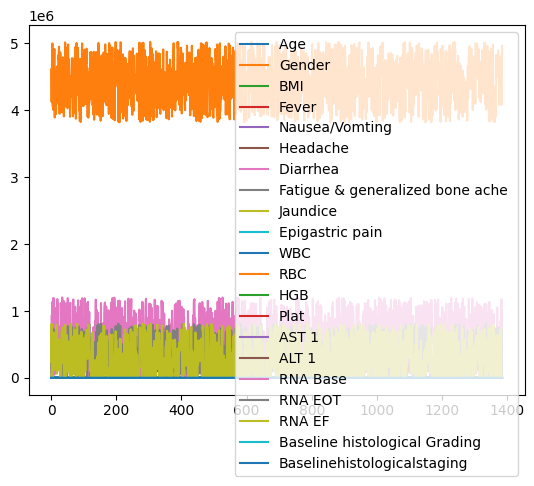

In [17]:
data.plot()

<Axes: >

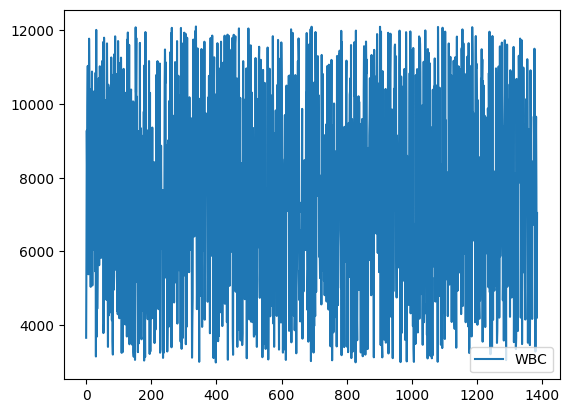

In [18]:
data.plot(y='WBC')

<Axes: >

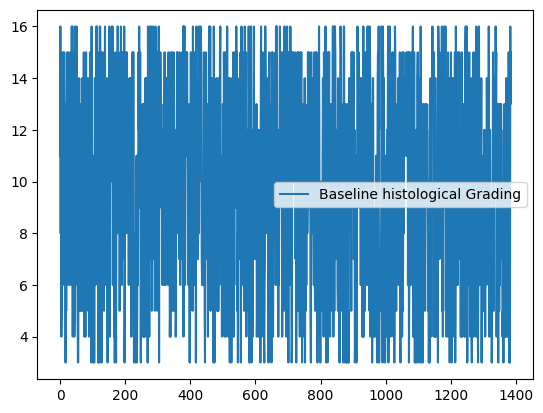

In [19]:
data.plot(y='Baseline histological Grading')

<Axes: >

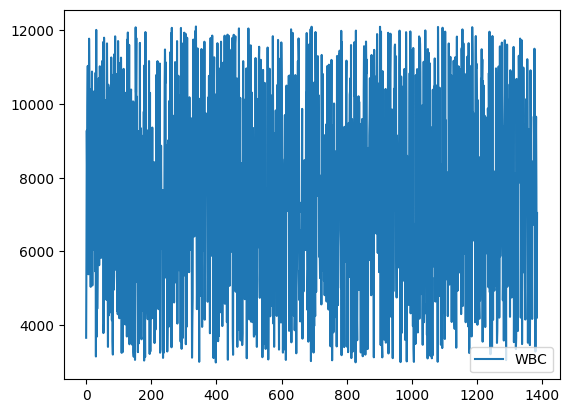

In [20]:
data.plot(y='WBC')

In [ ]:
# Age range

print("Min WBC = %d, Max WBC = %d" % (data.WBC.min(), data.WBC.max()))

Min WBC = 2991, Max WBC = 12101


In [22]:
# Age average

data.WBC.mean()

7533.386281588448

In [23]:
# WBC median

print("WBC median:", data.WBC.median())

print("BMI median:", data.BMI.median())

WBC median: 7498.0
BMI median: 29.0


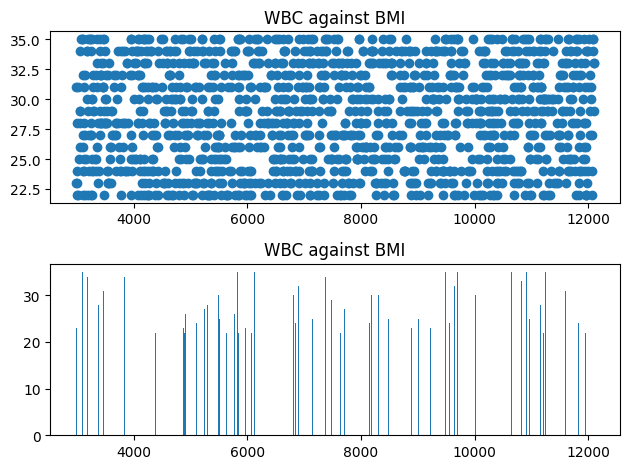

In [24]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.scatter(data['WBC'], data['BMI'])
plt.title('WBC against BMI')
bottom = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
bottom.bar(data['WBC'], data['BMI'])
plt.title('WBC against BMI')
plt.tight_layout()

Baselinehistologicalstaging
0    [[Axes(0.125,0.747241;0.133621x0.132759), Axes...
1    [[Axes(0.125,0.747241;0.133621x0.132759), Axes...
dtype: object

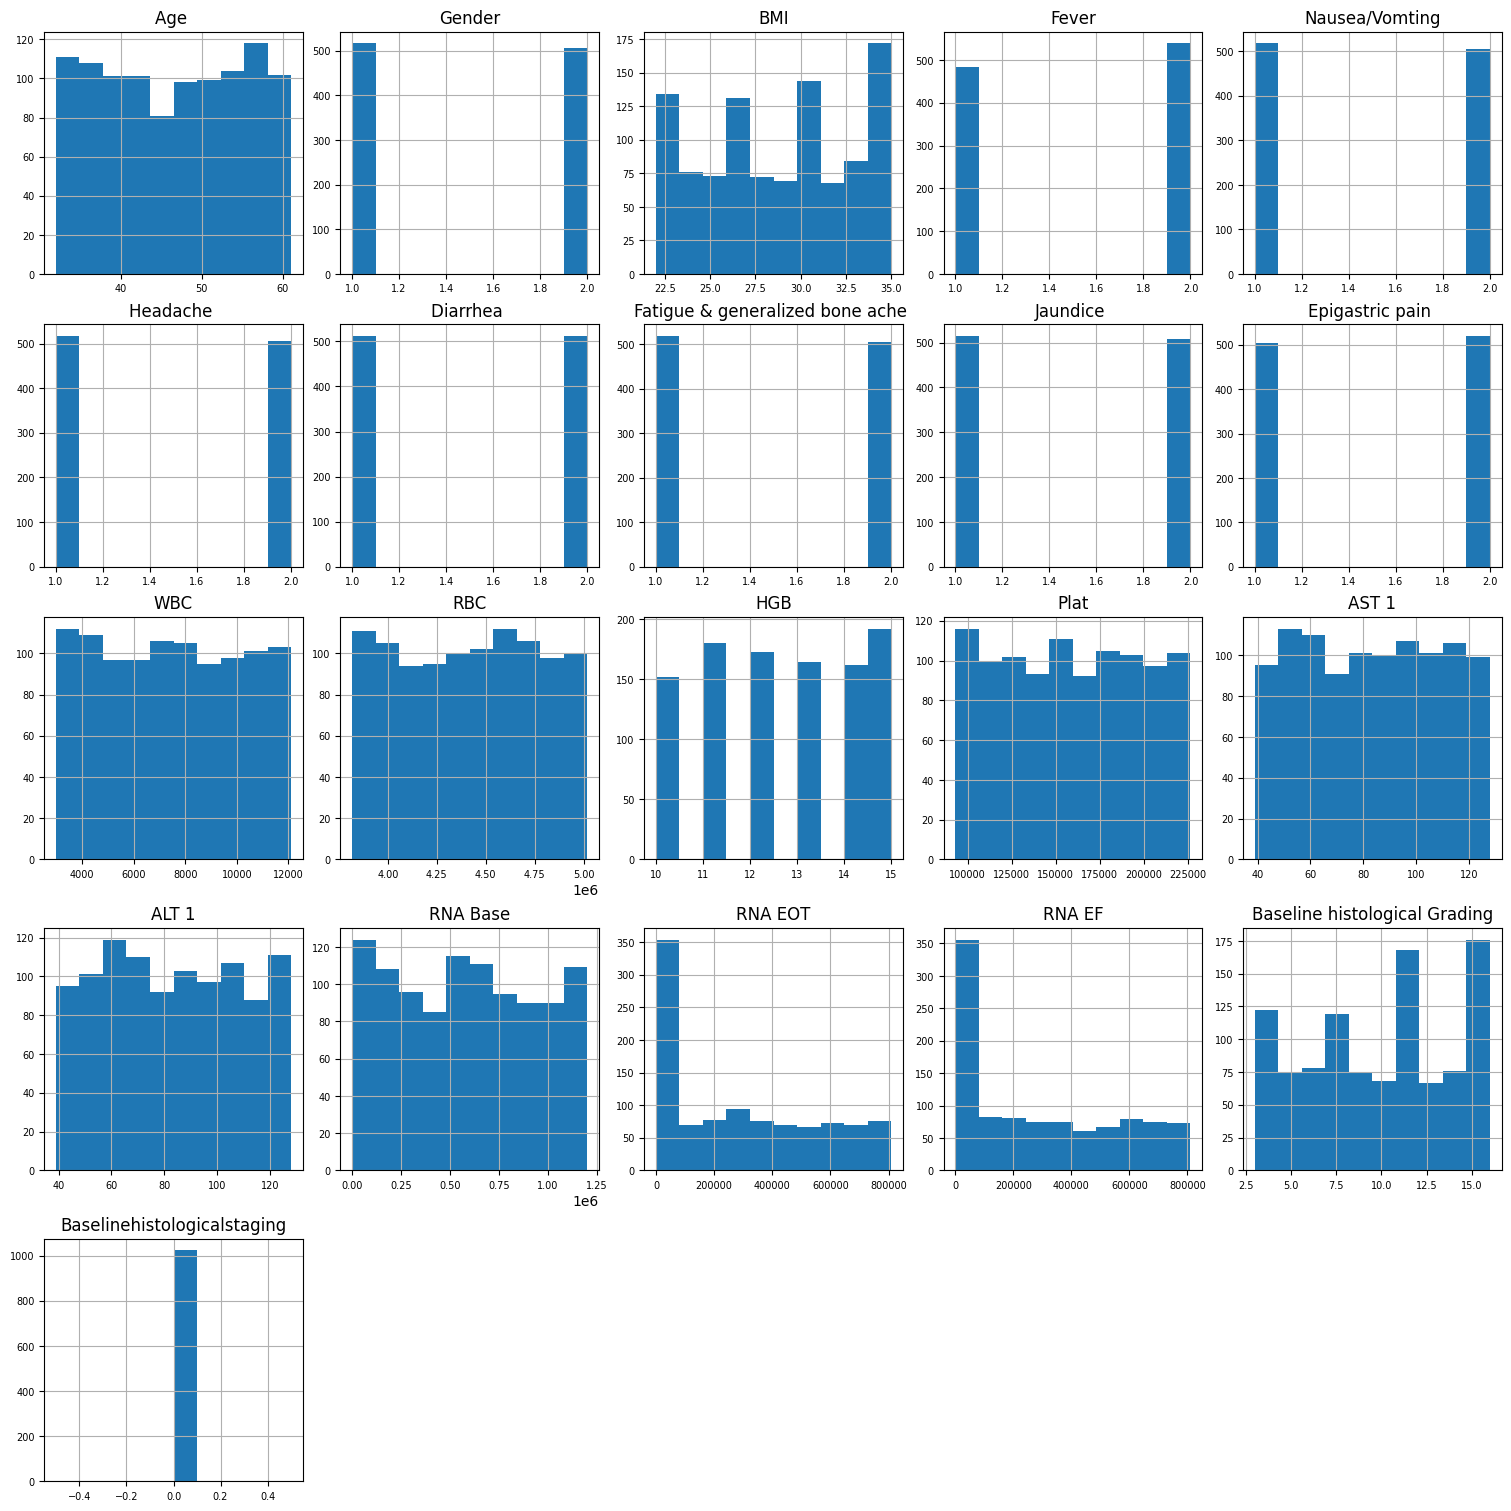

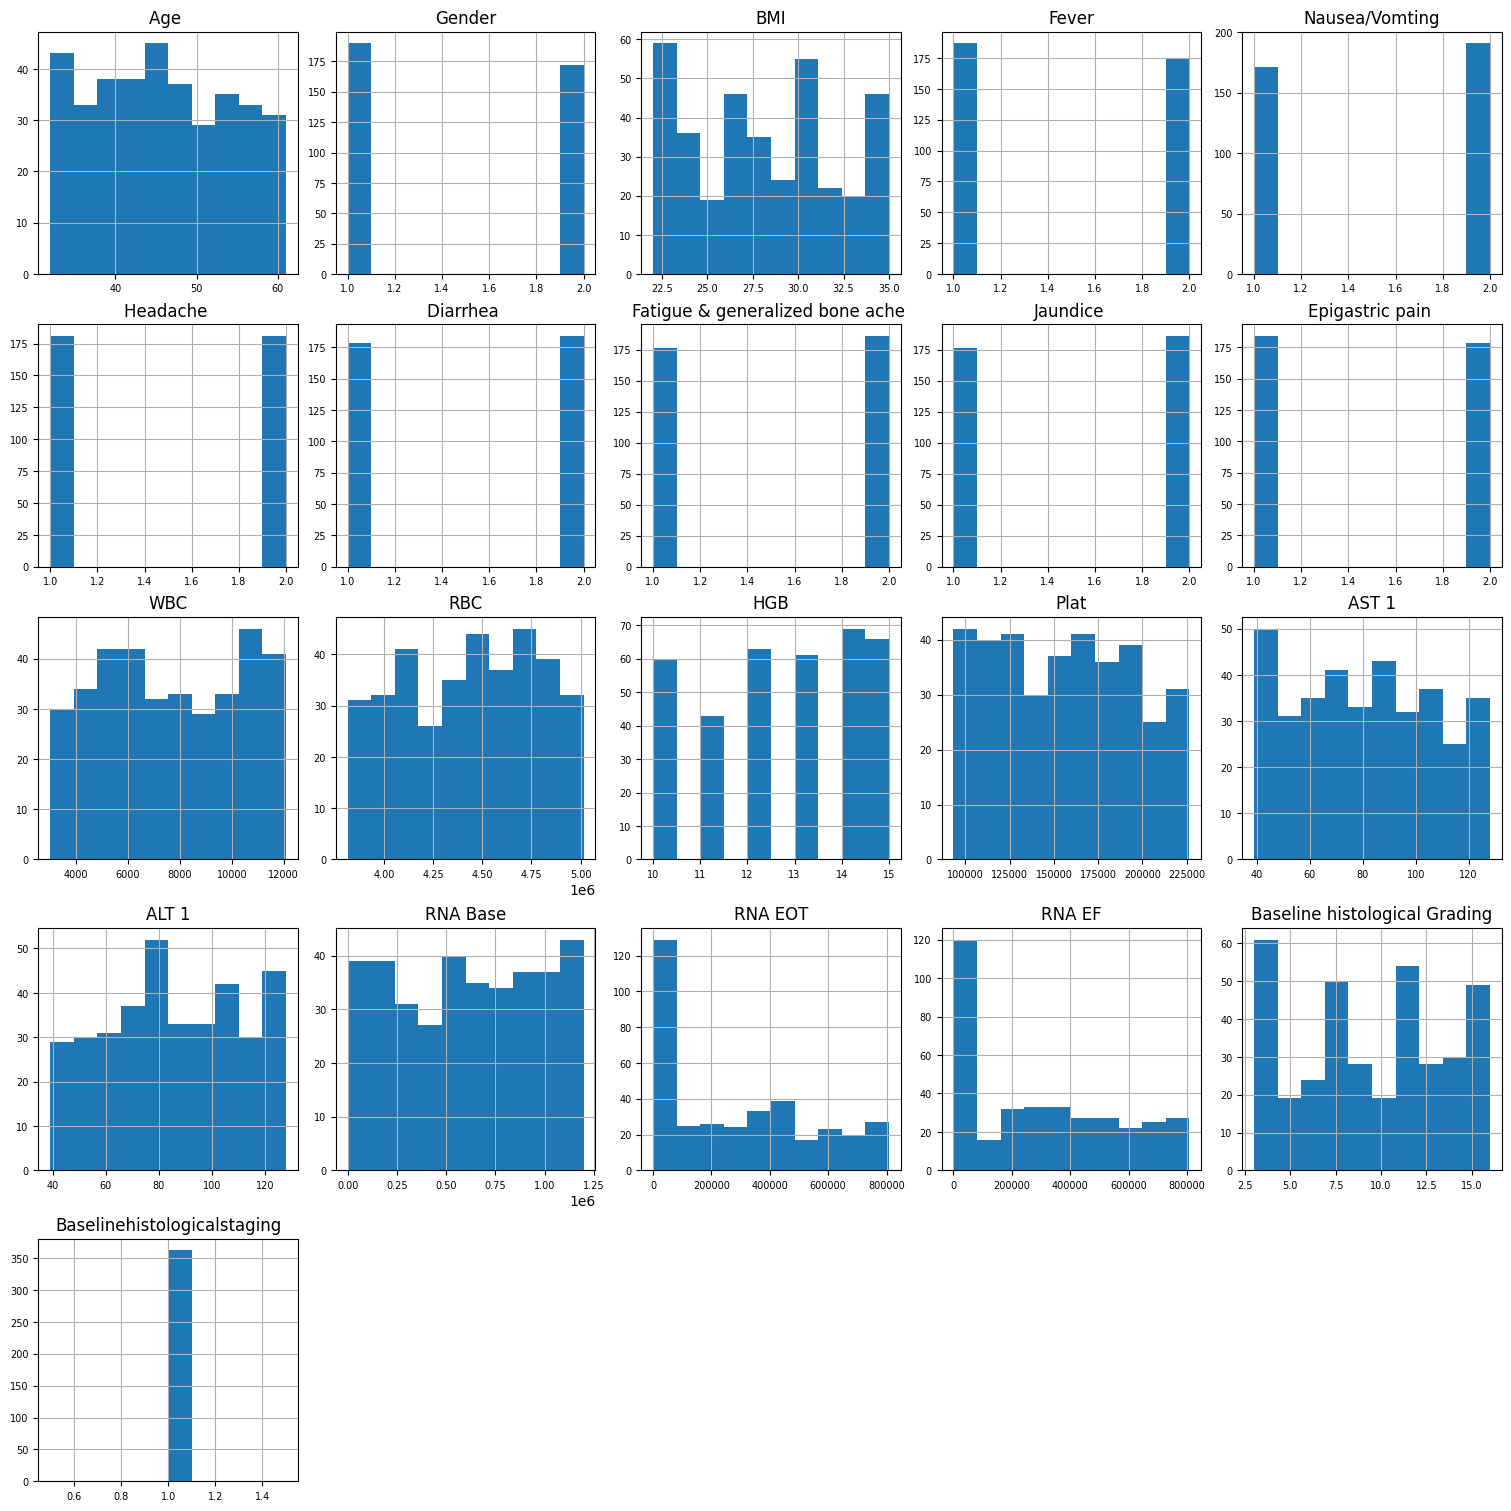

In [33]:
# The Pandas groupby method computes the distribution of one feature
# with respect to the others
# We see 8 histograms distrubuted against a negative diabetes check
# and other 8 histograms with distribution against a positive diabetes check

data.groupby('Baselinehistologicalstaging').hist(figsize=(15,15), xlabelsize=7, ylabelsize=7)